In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from zipfile import ZipFile

import plotly.express as px

%matplotlib inline

In [3]:
# Import all files
features = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/features.csv.zip')
stores = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/stores.csv')
train = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
test = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/test.csv.zip')

In [16]:
# Merged features and stores
df = features.merge(stores, on="Store", how='outer')
merged = train.merge(stores,how='left').merge(features, how='left')
test_merged = test.merge(stores,how='left').merge(features, how='left')

def split_date(x):
    x['Date'] = pd.to_datetime(x['Date'])
    x['Year'] = x.Date.dt.year
    x['Month'] = x.Date.dt.month
    x['Day'] = x.Date.dt.day
    x['WeekOfYear'] = (x.Date.dt.isocalendar().week)*1.0   
    
split_date(merged) 
split_date(test_merged)   



In [19]:
# Missing Values
import plotly.express as px
missing_values = df.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_white')

In [6]:
grouped = stores.groupby("Type")
grouped.describe()

Store                                                        Size  \
     count       mean        std   min    25%   50%    75%   max count   
Type                                                                     
A     22.0  22.227273  13.078269   1.0  11.50  25.0  32.75  41.0  22.0   
B     17.0  18.352941  11.028039   3.0  10.00  17.0  23.00  45.0  17.0   
C      6.0  39.000000   5.215362  30.0  37.25  40.0  42.75  44.0   6.0   

                                                                           \
               mean           std      min        25%       50%       75%   
Type                                                                        
A     177247.727273  49392.621098  39690.0  155840.75  202406.0  203819.0   
B     101190.705882  32371.137916  34875.0   93188.00  114533.0  123737.0   
C      40541.666667   1304.145033  39690.0   39745.00   39910.0   40774.0   

                
           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

([<matplotlib.patches.Wedge at 0x7f8c62fca0d0>,
 [Text(0.03838944408549134, 1.0993299098008782, 'A_Type'),
  Text(-0.48220823472661256, -0.9886734639717222, 'B_Type'),
  Text(1.0049000355222, -0.4474102352511412, 'C_Type')],
 [Text(0.02093969677390436, 0.5996344962550244, '48.9%'),
  Text(-0.2630226734872432, -0.5392764348936666, '37.8%'),
  Text(0.548127292103018, -0.24404194650062244, '13.3%')])

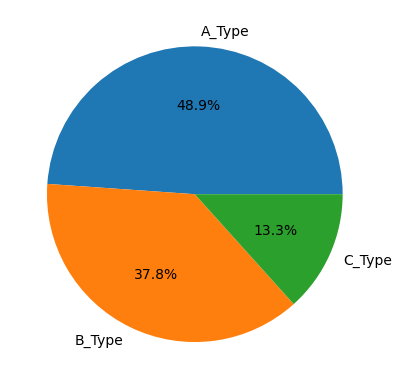

In [7]:
# The propertion of data in each type (A,B,C)
# Popularity of Store Types
import matplotlib.pyplot as plt
labels = "A_Type", "B_Type", "C_Type"
sizes = [22, 17, 6]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

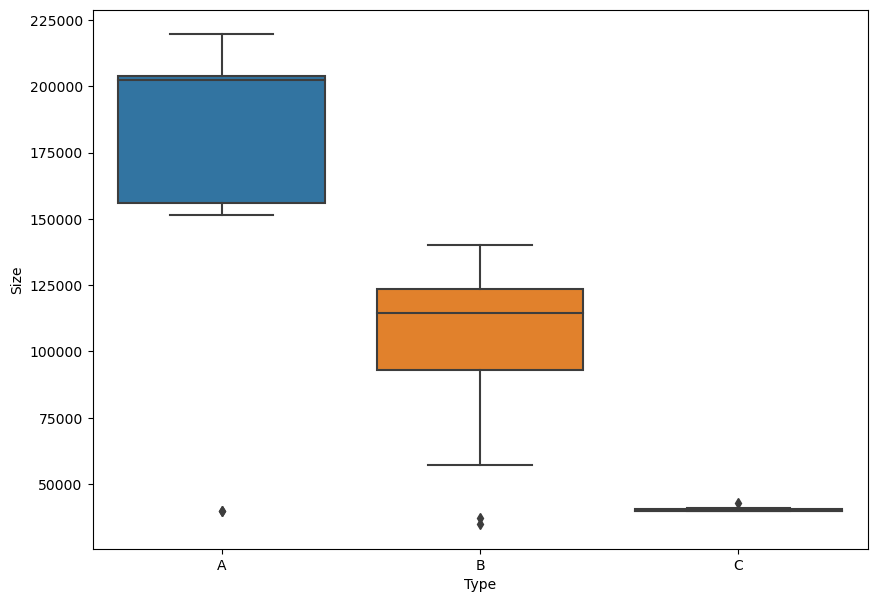

In [8]:
# T#he size of the type of the sales in each of the types - No Overlapping 
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.concat([stores["Type"], stores["Size"]],axis=1)

f, ax = plt.subplots(figsize =(10, 7))
fig = sns.boxplot(x="Type",y="Size",data=df1)

It represents Type is the best predictor for Size 

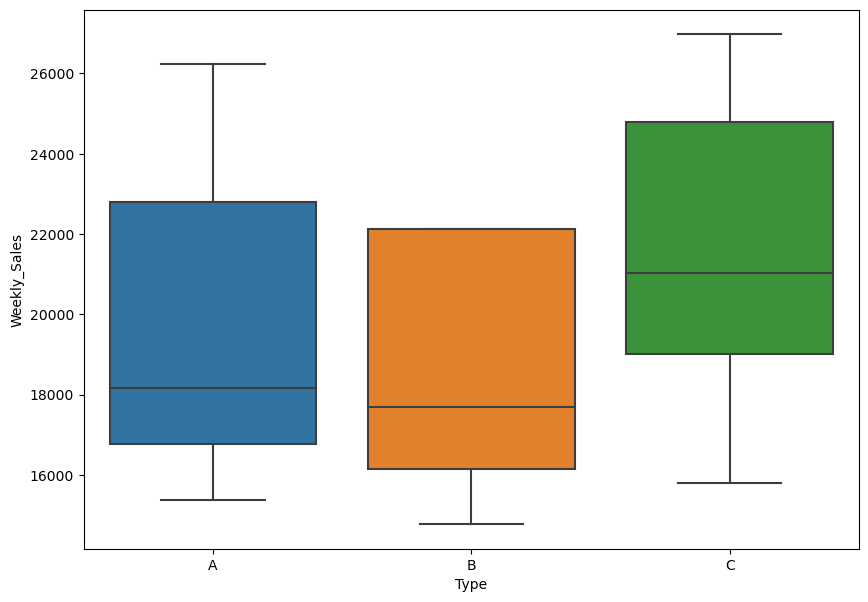

In [9]:
# The number of weekly sales of each of the types - Overlapping too much 
df2 = pd.concat([stores["Type"], train["Weekly_Sales"]],axis=1)

f, ax = plt.subplots(figsize =(10,7))
fig = sns.boxplot(x="Type",y="Weekly_Sales",data=df2,showfliers=False)

In [18]:
# Average Monthly Sales - Per Year
sales2010 = merged[(merged.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2010 = pd.DataFrame(list(sales2010.items()), columns=['Month', 'AvgSales2010'])

sales2011 = merged[merged.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2011 = pd.DataFrame(list(sales2011.items()), columns=['Month', 'AvgSales2011'])

sales2012 = merged[merged.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2012 = pd.DataFrame(list(sales2012.items()), columns=['Month', 'AvgSales2012'])

monthly_merged = df2010.merge(df2011, how='right', on='Month').merge(df2012, how='left', on='Month')

import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2010.Month,
                y = df2010.AvgSales2010,
                name = "AvgSales2010")
# create trace2 
trace2 = go.Bar(
                x = df2011.Month,
                y = df2011.AvgSales2011,
                name = "AvgSales2011")

# create trace3 
trace3 = go.Bar(
                x = df2012.Month,
                y = df2012.AvgSales2012,
                name = "AvgSales2012")
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group",
                   template='plotly_white',
                   xaxis_title="Month",
                   yaxis_title="Average Monthly Sales")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes( dtick=1)
fig.show()

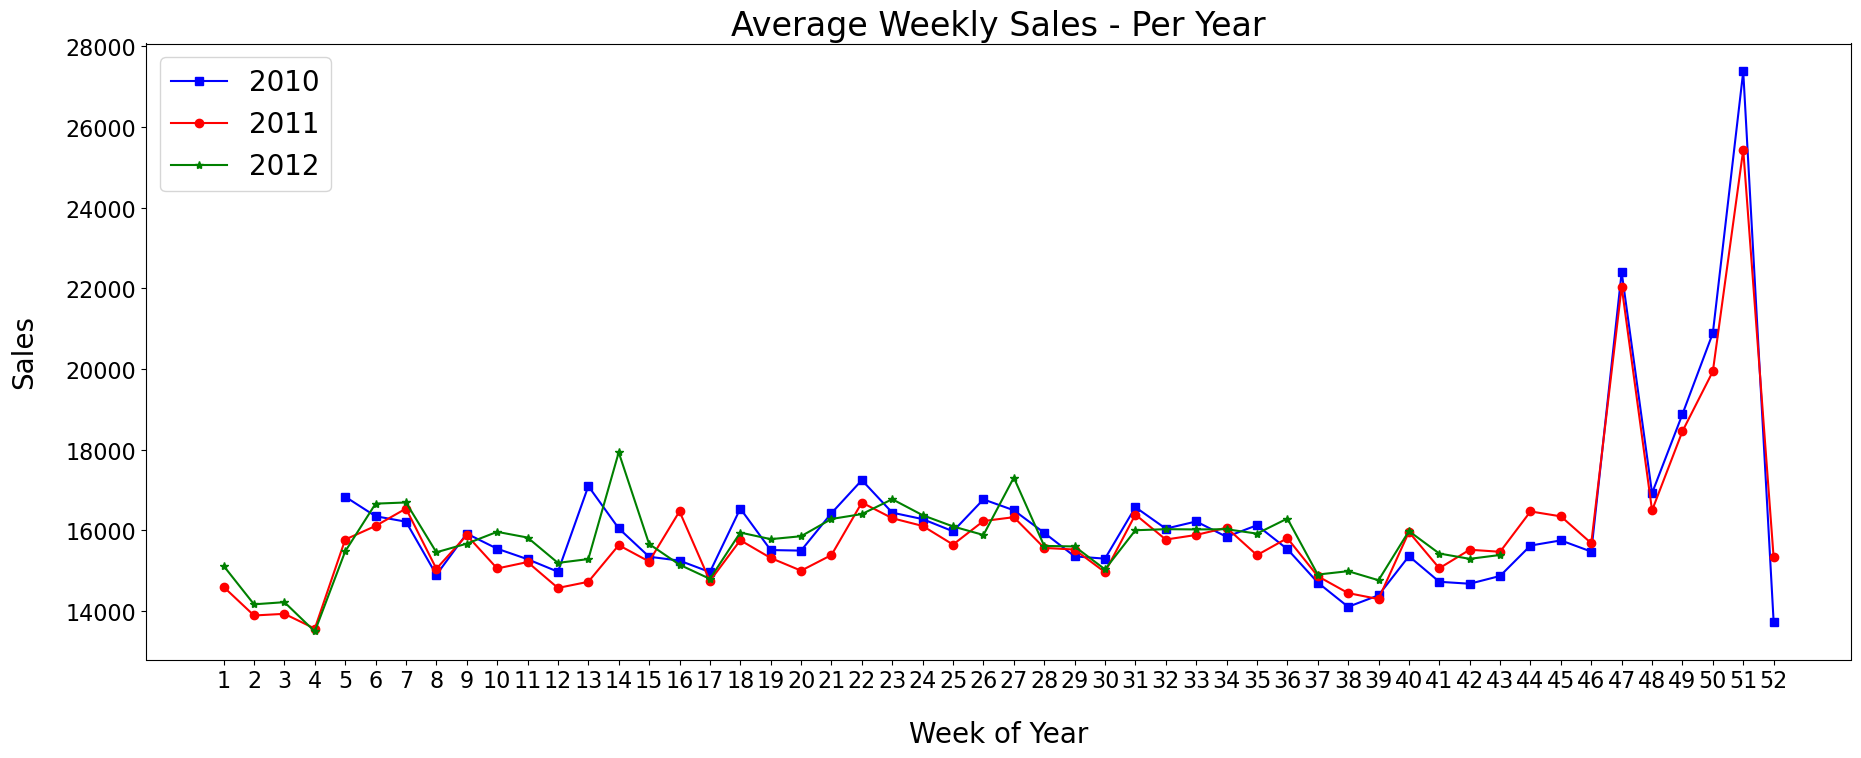

In [20]:
# Average Weeklys Sales - Per Year
weekly_sales_2010 = merged[merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged[merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged[merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

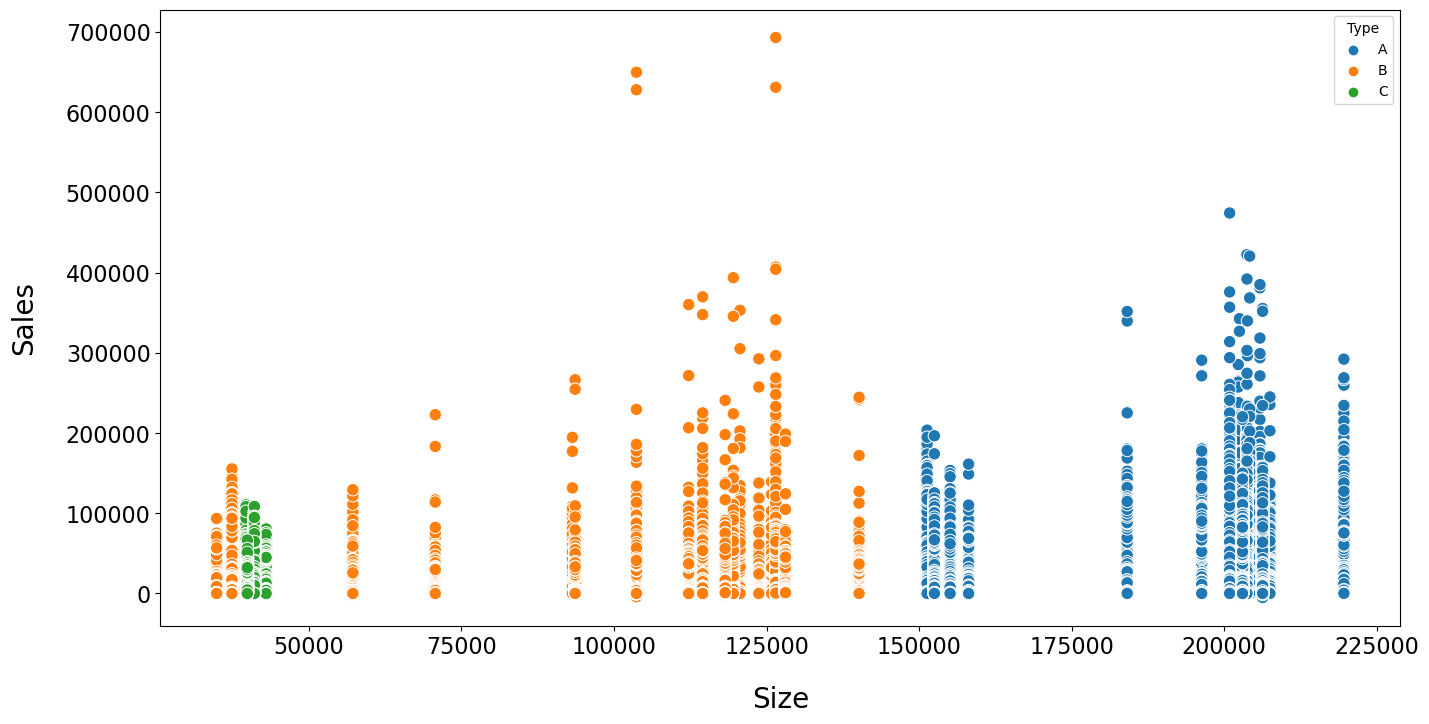

In [21]:
# The Relationship Between Size of Store and Sales
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Size, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

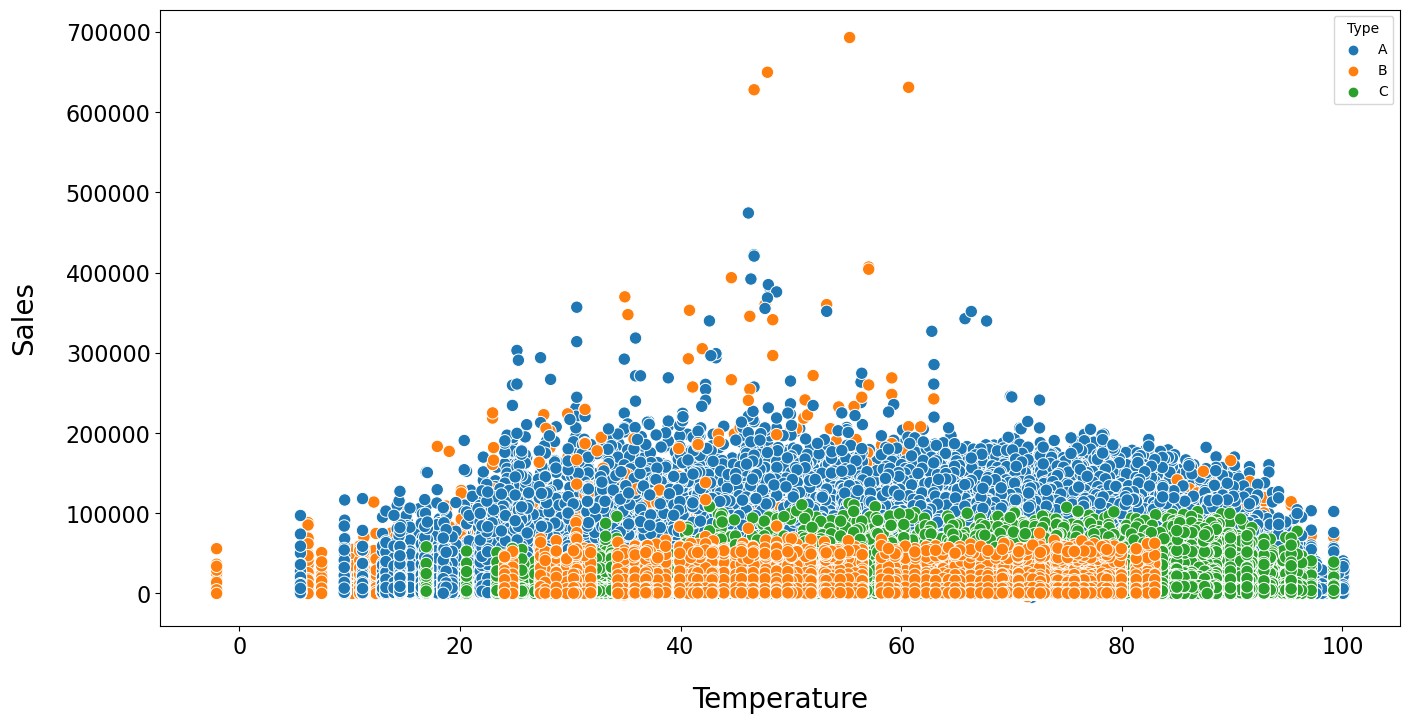

In [22]:
# The Relationship Between Temperature and Sales
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Temperature, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

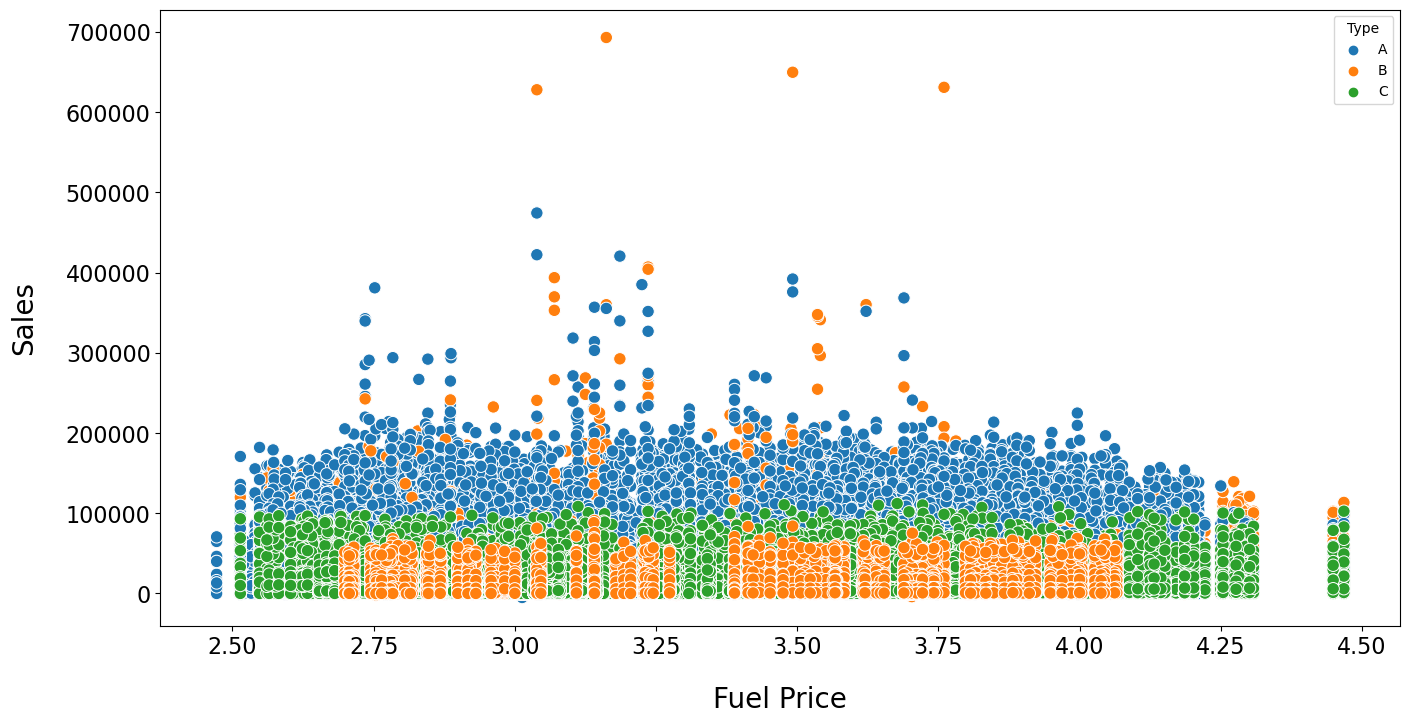

In [23]:
# The Relationship Between Fuel Price and Sales
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Fuel_Price, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

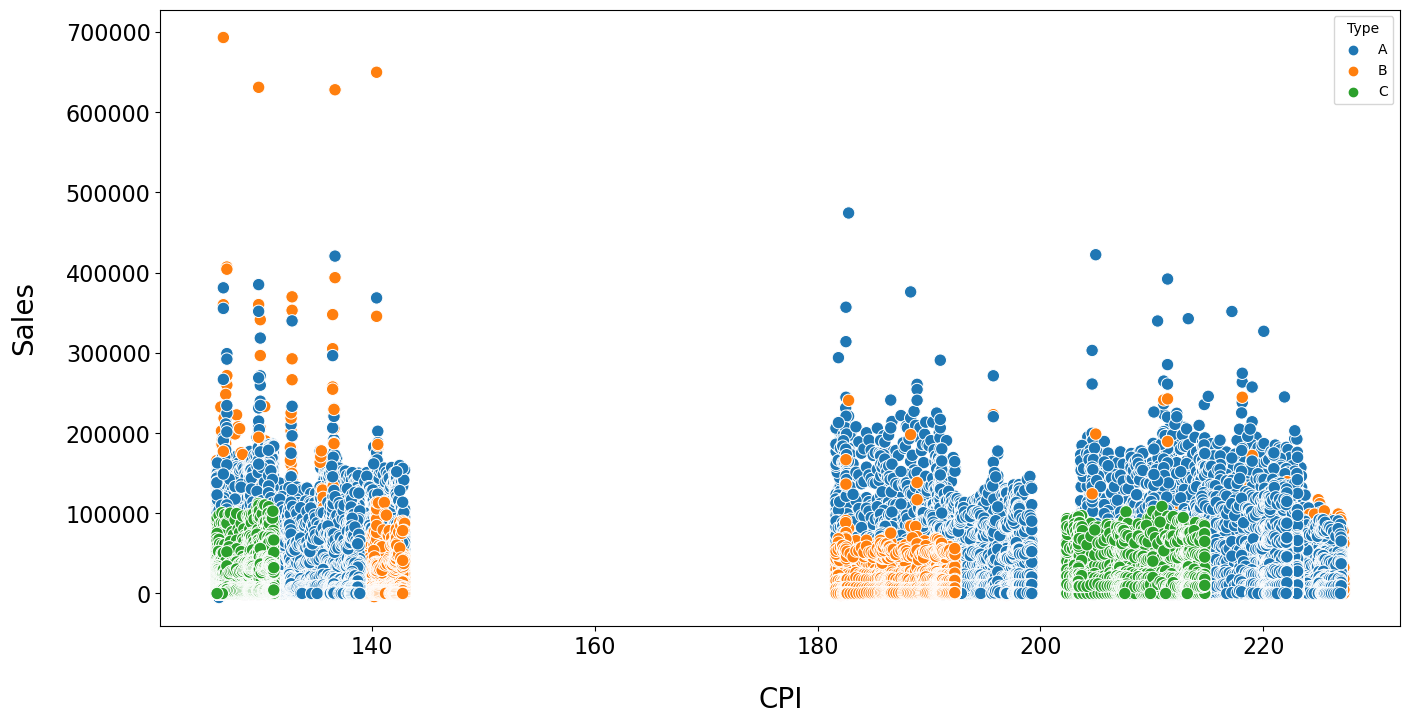

In [24]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.CPI, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

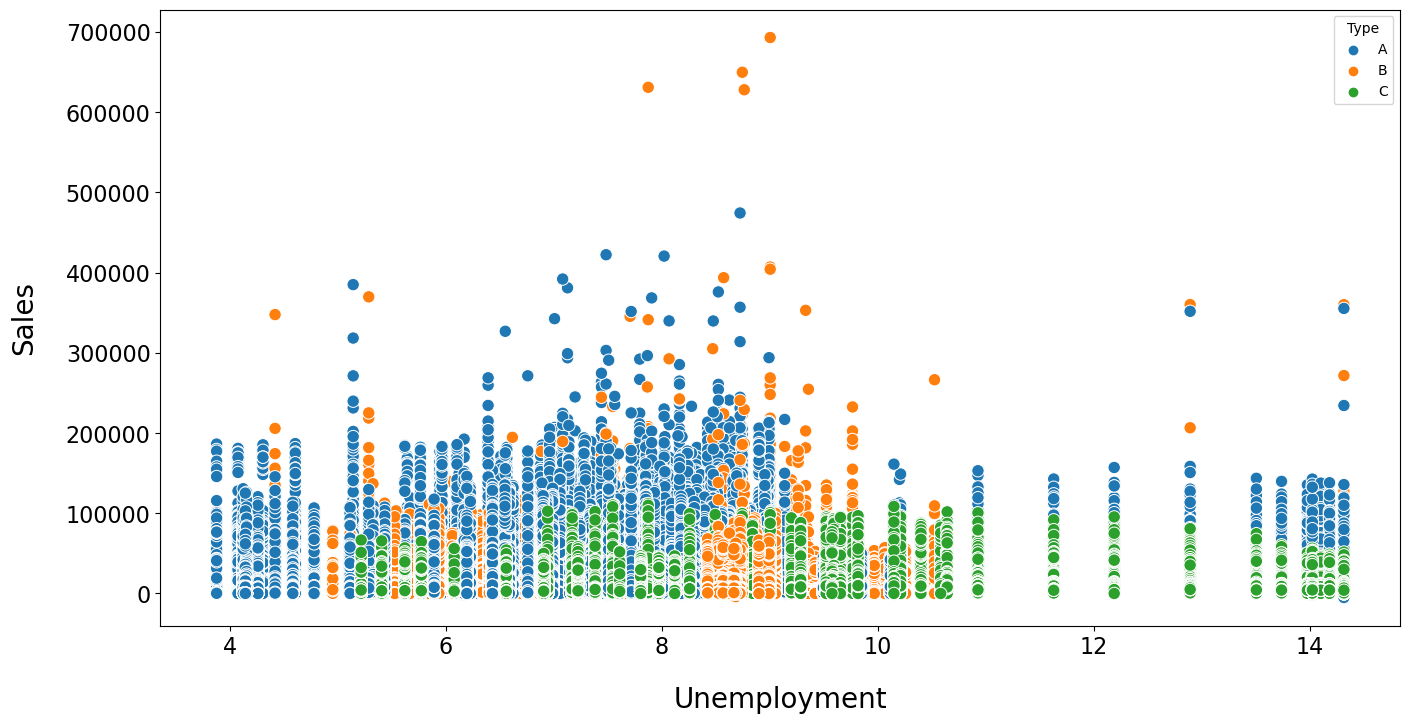

In [25]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Unemployment, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

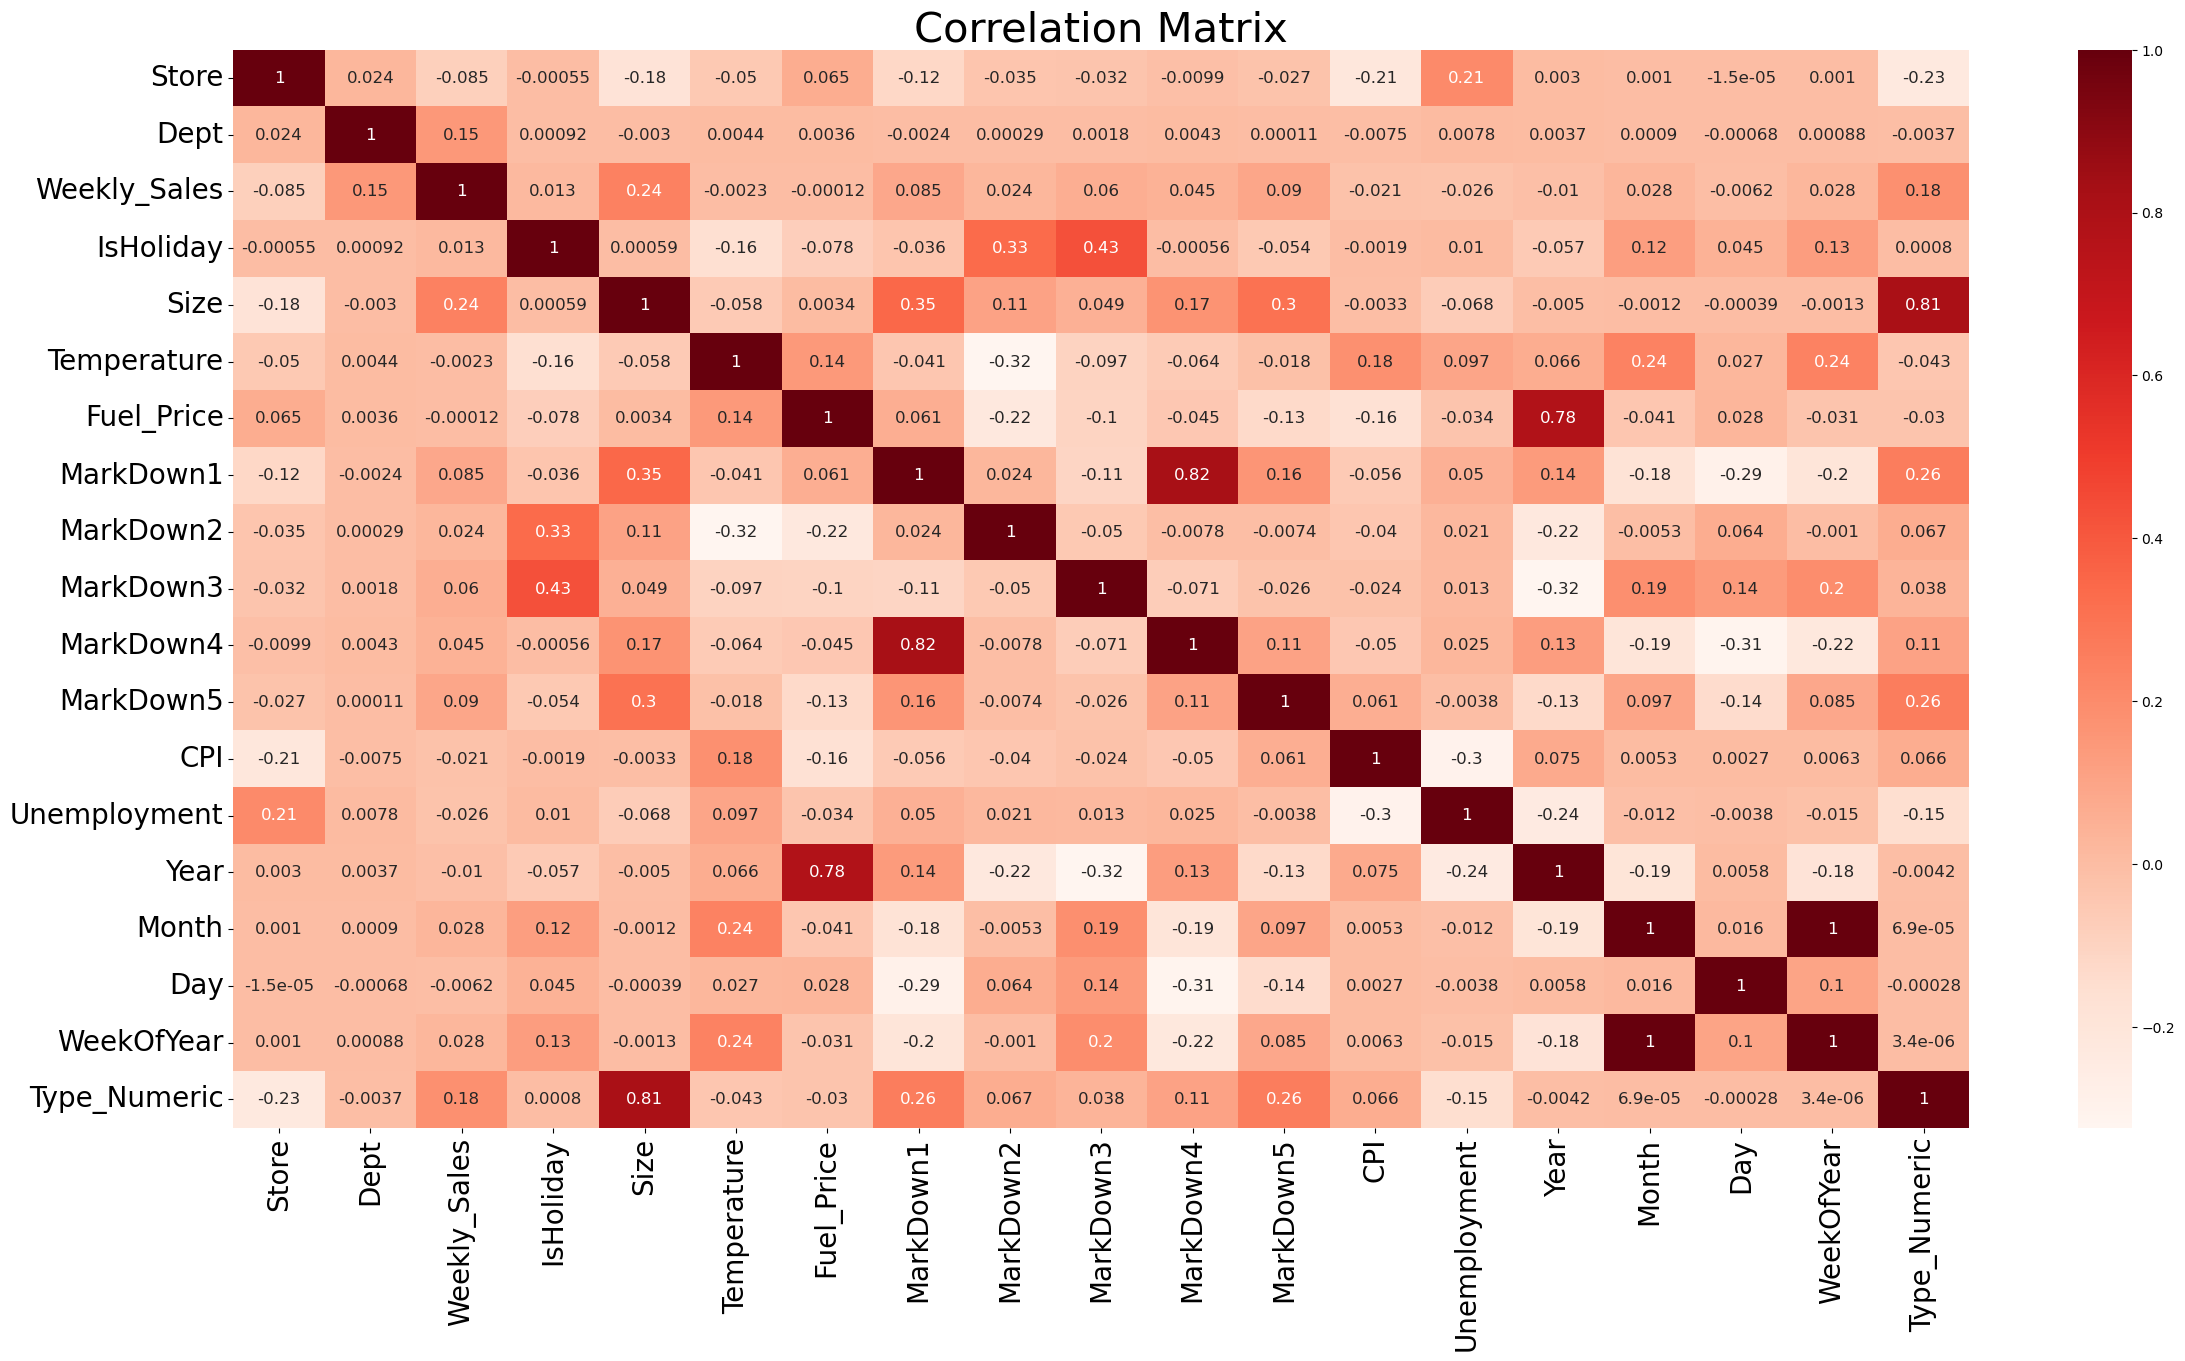

In [28]:
# Correlation Matrix
storetype_values = {'A':3, 'B':2, 'C':1}
merged['Type_Numeric'] = merged.Type.map(storetype_values)
test_merged['Type_Numeric'] = test_merged.Type.map(storetype_values)


plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(merged.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  float64       
 1   Dept          115064 non-null  float64       
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  float64       
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  float64       
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     114915 non-null  float64       
 9   MarkDown2     86437 non-null   float64       
 10  MarkDown3     105235 non-null  float64       
 11  MarkDown4     102176 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  76902 non-null   float64       
 15  Year          115

In [59]:
# Data Preparation
merged = merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

KeyError: "['Date' 'Temperature' 'Fuel_Price' 'Type' 'MarkDown1' 'MarkDown2'\n 'MarkDown3' 'MarkDown4' 'MarkDown5' 'CPI' 'Unemployment' 'Month' 'Day'] not found in axis"

In [60]:
test_merged = test_merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)




In [41]:
# Identify input and target columns

input_cols = merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = merged[input_cols].copy()
targets = merged[target_col].copy()

# Scale the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(merged[input_cols])

inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
test_merged[input_cols] = scaler.transform(test_merged[input_cols])

# Create training and validation sets

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.3, random_state=42)

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

In [42]:
# Machine Learning
# Linear Regression
!pip install scikit-learn --quiet

In [43]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model.predict(train_inputs)

# Compute WMAE on traing data
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('The WMAE loss for the validation set is  {}.'.format(val_wmae))

The WMAE loss for the training set is  14776.36.
The WMAE loss for the validation set is  14884.37.


In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Compute WMAE on traing data
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('The WMAE loss for the training set is  {}.'.format(tree_train_wmae))


# Compute WMAE on validation data
tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(tree_val_wmae))

The WMAE loss for the training set is  0.0.
The WMAE loss for the validation set is  1933.48.


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  572.07.
The WMAE loss for the validation set is  1592.29.


In [46]:
# Gradient Boosting Machine
!pip install xgboost lightgbm --upgrade --quiet

In [47]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  2979.66.
The WMAE loss for the validation set is  3090.44.


In [50]:
#tuned parameters
def test_params_xgb(**params):  
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

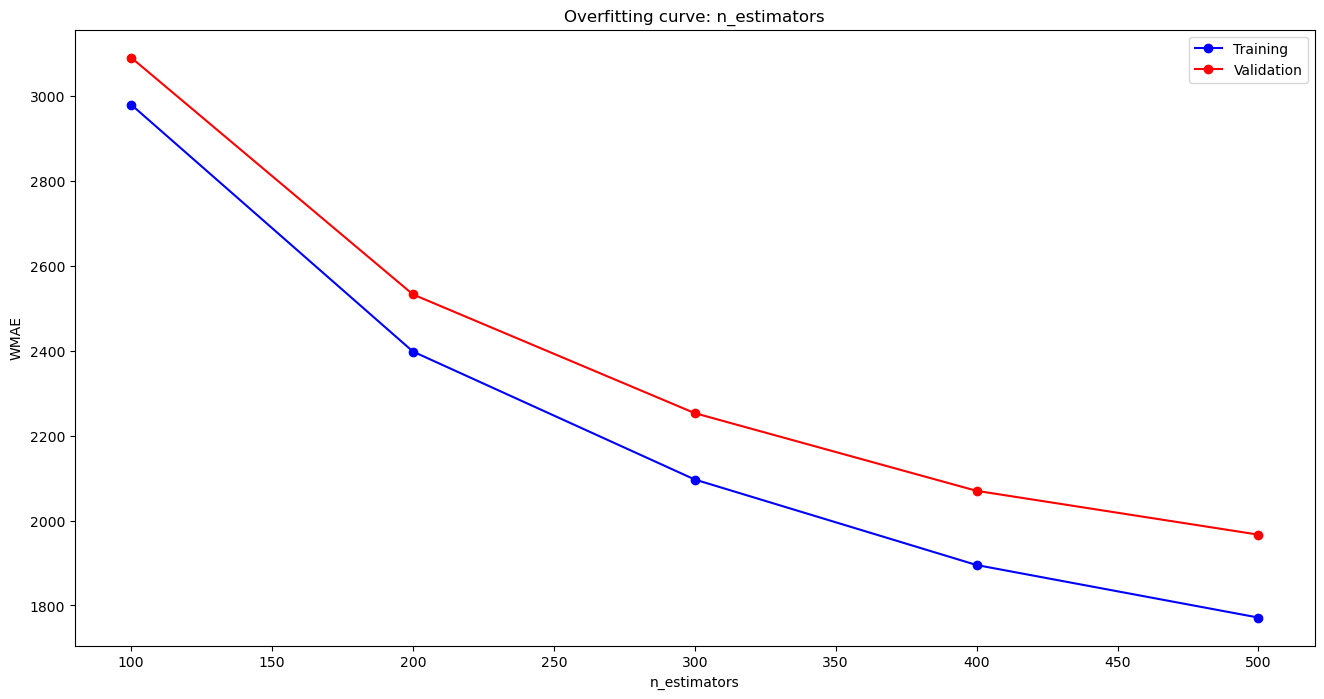

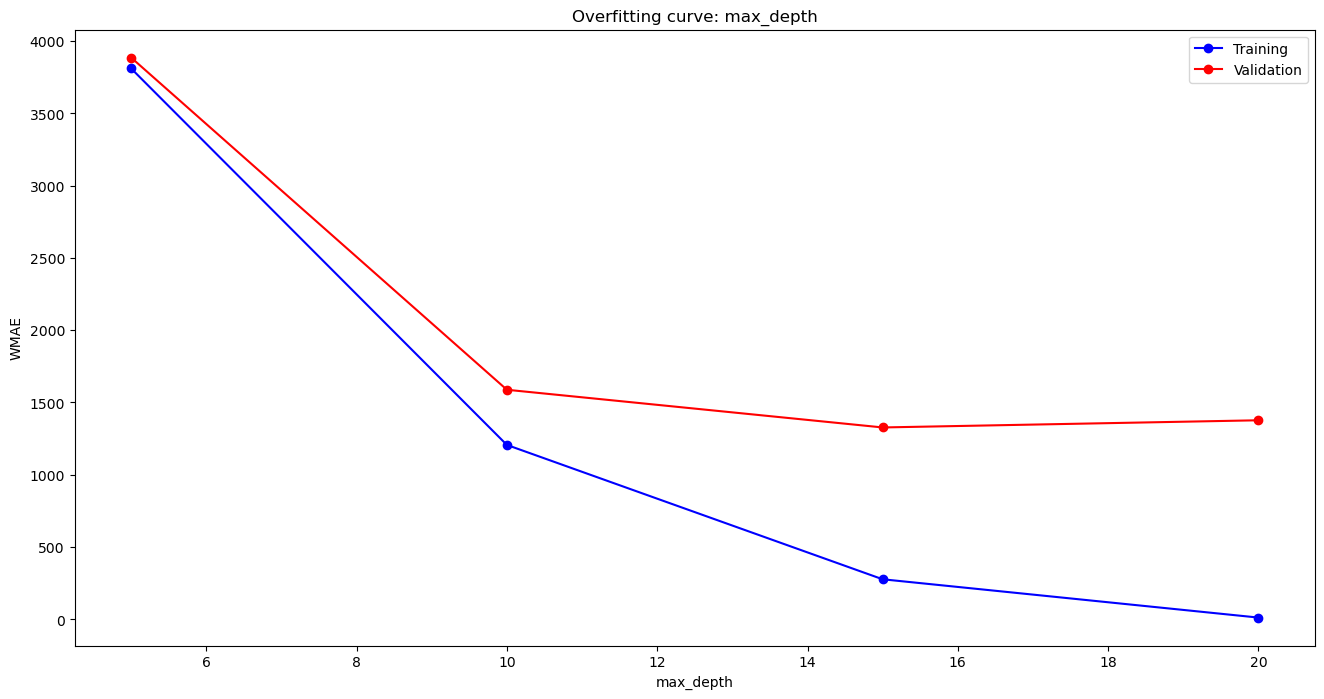

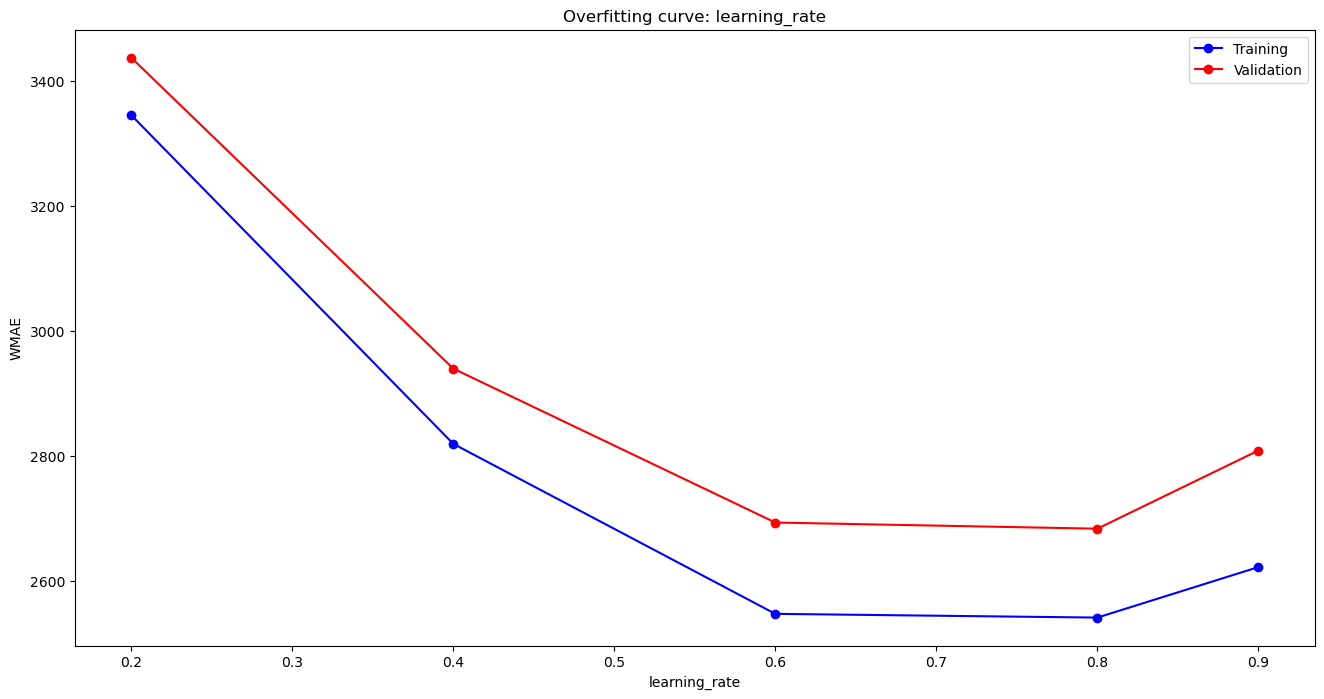

In [51]:
test_param_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500])
test_param_and_plot_xgb('max_depth', [5, 10, 15, 20])
test_param_and_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])


In [52]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))


The WMAE loss for the training set is  16.66.
The WMAE loss for the validation set is  1339.29.


In [63]:
test_predict = gbm.predict(test_merged)
test_merged['Weekly_Sales'] = test_predict